<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Ago18-19/Tarea_Ago19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mínimos cuadrados - solución matricial

Por Isaías Hernández Lares - Machine Learning 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

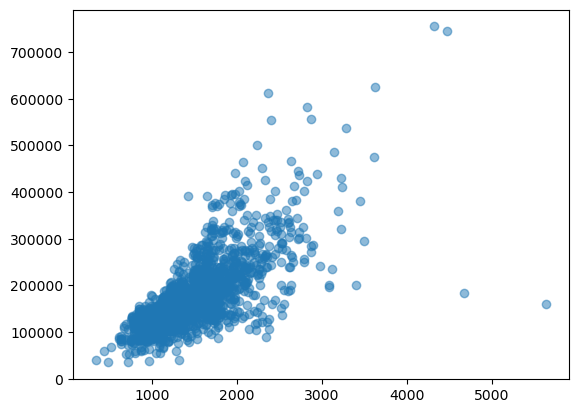

In [ ]:
#Leyendo el conjunto de datos
df = pd.read_csv("train.csv")
x = df['GrLivArea']
y = df['SalePrice']
plt.scatter(x, y, alpha=0.5)
plt.show()

El conjunto de datos describe diversas características y atributos relacionados con propiedades residenciales en un conjunto de datos. Estos atributos incluyen detalles sobre el tipo de vivienda, zonificación, características del lote, condiciones de la propiedad, características exteriores e interiores, así como detalles sobre garajes, piscinas y otros elementos.

Las variables del dataframe relevantes son:
+ GrLivArea (Above ground living area) se refiere al espacio habitable en una vivienda que está por encima del nivel del suelo. En otras palabras, se trata del espacio de vida que no incluye sótanos ni áreas subterráneas.
+ SalePrice (Precio de Venta) se refiere al monto monetario por el cual una propiedad, producto o servicio es vendido.

Una relación "GrLivArea" y "SalePrice" significa que el tamaño del área habitable aumenta y el precio de venta también tiende a aumentar en una forma predecible. Buscamos un modelo que ajuste los datos.

Descripcion de la funcion e idea de cómo resolver el coso
La siguiente función implementa la solución:
\begin{align}
    W = (X^{T}X)^{-1}X^{T}t
\end{align}
Para obtener la matriz W que tiene los coeficientes que minimizan la función de costo.

In [ ]:
def w_mat(x, y):
  X = np.vstack((np.ones_like(x), x, x**2)).T
  t = y
  XX = np.matmul(X.T,X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  return w

Utilizamos el modelo de un polinomio cuadrático para ajustar el conjunto de datos:

\begin{align}
    y(x) &= ax^2 + bx + c \\
\end{align}

Después compararemos con el modelo de un polinomio cúbico para mostrar la diferencia entre los ajustes.

\begin{align}
    y(x) &= ax³ + bx^2 + cx + d \\
\end{align}


In [ ]:
# Obteneniendo los coeficientes del ajuste cuadrático
W1 = w_mat(x, y)

x1 = np.linspace(min(x), max(x), 1000)
y1 = W1[0] + W1[1]*x1 + W1[2]*x1**2

In [ ]:
def w_mat_cub(x, y):
  X = np.vstack((np.ones_like(x), x, x**2, x**3)).T
  t = y
  XX = np.matmul(X.T,X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  return w

In [ ]:
# Obteneniendo los coeficientes del ajuste cúbico
W2 = w_mat_cub(x, y)

y2 = W2[0] + W2[1]*x1 + W2[2]*x1**2 + W2[3]*x1**3

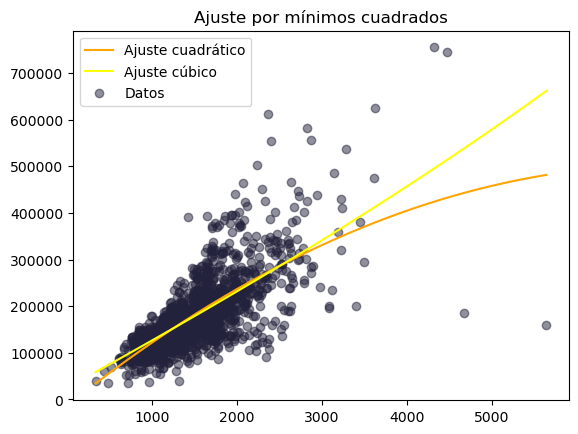

In [ ]:
# Graficando el modelo y los datos
plt.plot(x1, y1, label="Ajuste cuadrático", c="orange")
plt.plot(x1, y2, label="Ajuste cúbico", c="yellow")
plt.scatter(x, y, label="Datos", c="#23223C", alpha=.5)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()